In [66]:
import os
import pandas as pd
from mlflow.models import infer_signature
root_path = os.getcwd()
white_wine = pd.read_csv(root_path+"/winequality-white.csv",sep=";")
red_wine = pd.read_csv(root_path+"/winequality-red.csv",sep=";")


In [67]:
red_wine['is_red'] = 1
white_wine['is_red'] = 0

In [68]:
data = pd.concat([red_wine,white_wine],axis=0)
print("data shape: ",data.shape)

data shape:  (6497, 13)


In [69]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


### Check data Corelation

In [70]:
data.rename(columns=lambda x: x.replace(' ','_'),inplace=True)
data.corr()


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,is_red
fixed_acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,0.486740
volatile_acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,0.653036
citric_acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,-0.187397
residual_sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,-0.348821
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,0.512678
free_sulfur_dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,-0.471644
total_sulfur_dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,-0.700357
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,0.390645
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,0.329129
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,0.487218


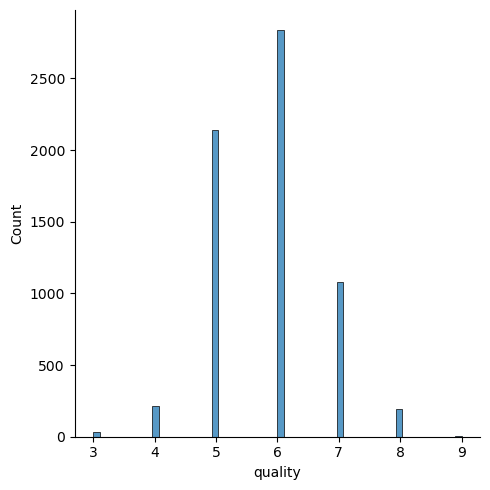

In [71]:
import seaborn as sns
sns.displot(data.quality)

In [72]:
high_quality = (data.quality >= 7).astype(int)
data.quality= high_quality


data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,is_red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,1


### Create Train and Test set

In [73]:
X = data.drop(['quality'],axis=1)
y = data.quality

In [74]:
from sklearn.model_selection import train_test_split


X_train, X_rem , y_train, y_rem = train_test_split(X,y,train_size=0.8,random_state=123)

# Split the remaining data euqally into validation and test
X_val, X_test, y_val, y_test = train_test_split(X_rem,y_rem,test_size=0.5,random_state=123)


print("X_train : ",X_train.shape)
print("X_test : ",X_test.shape)
print("X_val : ",X_val.shape)


X_train :  (5197, 12)
X_test :  (650, 12)
X_val :  (650, 12)


### Create model and train

In [75]:
import mlflow
from sklearn.ensemble import RandomForestRegressor

In [76]:
mlflow_exp_name = "v4_end_to_end_mlflow"
mlflow.set_experiment(mlflow_exp_name)

<Experiment: artifact_location='file:///Users/tharhtet/Documents/github/ML-in-Prod-batch-1/8_Experiment_Tracking/mlruns/986783244277383216', creation_time=1726761035241, experiment_id='986783244277383216', last_update_time=1726761035241, lifecycle_stage='active', name='v4_end_to_end_mlflow', tags={}>

In [77]:
mlflow.sklearn.autolog()

with mlflow.start_run(run_name="test_run"):
    n_estimators = 110
    max_depth = 10
    max_features = 3

    rf =  RandomForestRegressor(n_estimators=n_estimators,max_depth=max_depth,max_features=max_features)
    rf.fit(X_train,y_train)

    predictions = rf.predict(X_test)
    print("predictions : ", predictions.shape)


    # Infer the model signature
    signature = infer_signature(X_train, rf.predict(X_train))

    # Log the model
    model_info = mlflow.sklearn.log_model(
        sk_model=rf,
        artifact_path="random_forest_model",
        signature=signature,
        input_example=X_train
    )


model_uri = model_info.model_uri
print("model_uri : ",model_uri)

2024/09/19 23:18:01 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/opt/anaconda3/envs/ths/lib/python3.10/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2024/09/19 23:18:01 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/opt/anaconda3/envs/ths/lib/python3.10/site-p

predictions :  (650,)


2024/09/19 23:18:03 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/opt/anaconda3/envs/ths/lib/python3.10/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."


model_uri :  runs:/d7a664608fb04ff98b492b65d4fc2062/random_forest_model


### Register the model

In [78]:
model_name = "wine_model_rf"
model_version = mlflow.register_model(model_uri, model_name)

Registered model 'wine_model_rf' already exists. Creating a new version of this model...
Created version '3' of model 'wine_model_rf'.


In [79]:
print("model_version : ",model_version)

model_version :  <ModelVersion: aliases=[], creation_timestamp=1726762683869, current_stage='None', description=None, last_updated_timestamp=1726762683869, name='wine_model_rf', run_id='d7a664608fb04ff98b492b65d4fc2062', run_link=None, source='file:///Users/tharhtet/Documents/github/ML-in-Prod-batch-1/8_Experiment_Tracking/mlruns/986783244277383216/d7a664608fb04ff98b492b65d4fc2062/artifacts/random_forest_model', status='READY', status_message=None, tags={}, user_id=None, version=3>


In [80]:
# Set alias with production
from mlflow.tracking import MlflowClient
client = MlflowClient()
client.set_registered_model_alias(name=model_name,
                                       version=model_version.version, alias="Production")

### Load model 

In [81]:
from sklearn.metrics import roc_auc_score

In [82]:
loaded_model = mlflow.pyfunc.load_model(f"models:/{model_name}@Production")
result = loaded_model.predict(X_test)
print(result)

2024/09/19 23:18:05 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/opt/anaconda3/envs/ths/lib/python3.10/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."


[0.28506995 0.16917416 0.05845993 0.01114471 0.46692182 0.05479087
 0.06098618 0.17652397 0.2755596  0.12699877 0.02130638 0.59854886
 0.08386819 0.06938677 0.39120593 0.62187718 0.02779526 0.44351256
 0.05455669 0.0239695  0.01757799 0.18381914 0.33286547 0.0117929
 0.01415541 0.30890333 0.28102301 0.15558841 0.0159757  0.5832369
 0.00634252 0.12664396 0.04076887 0.28253196 0.00259836 0.80130583
 0.35960194 0.5753887  0.43235834 0.04733979 0.11138477 0.28733055
 0.13779232 0.08363399 0.04710793 0.49402083 0.6446698  0.14029791
 0.03029933 0.1343634  0.12837442 0.00541516 0.28184678 0.06523041
 0.05178633 0.04333974 0.01845788 0.05520379 0.14029791 0.01946752
 0.00248516 0.32608716 0.57513083 0.22851992 0.22254863 0.11991854
 0.17448311 0.02430797 0.69074069 0.00496951 0.60915934 0.16310713
 0.01109938 0.54699593 0.46692182 0.0501839  0.5719126  0.44560807
 0.09660093 0.09775715 0.08321417 0.02917216 0.1680672  0.35189034
 0.13229255 0.161797   0.14900838 0.54188012 0.25361919 0.205083

In [83]:
X_test.shape

(650, 12)

In [84]:
sample_x = X_test.iloc[:2]
print(type(sample_x))
result = loaded_model.predict(sample_x)
print(result)

2024/09/19 23:18:06 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/opt/anaconda3/envs/ths/lib/python3.10/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."


<class 'pandas.core.frame.DataFrame'>
[0.28506995 0.16917416]


In [85]:
print(f"AUC:{roc_auc_score(y_test, loaded_model.predict(X_test))}")

2024/09/19 23:21:07 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/opt/anaconda3/envs/ths/lib/python3.10/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."


AUC:0.9187162433602643
